# Titanic Dataset Exploration

## Part 1: Data Exploration

Load in the titanic dataset from Seaborn. Document the columns that are missing data both numberically (via a count) and visually (via a sns heatmap). Document the categorical values. Answer the following questions:
- Did more women or men die on the Titanic?
- Which passenger class was more likely to survive?
- What does the distribution of fare look like?
- What does the distribution of non-null age values look like?
- What is the median age of each passenger class(pclass)? Visualize this in a box plot.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
# load in the seaborn titanic dataset
titanic= sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# get info on the data set to get a quick glance at missing values
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


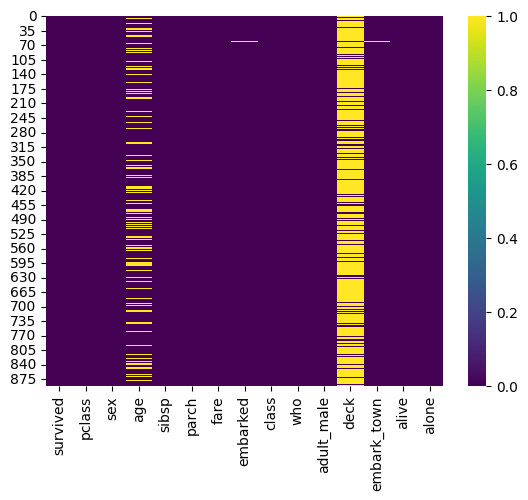

In [4]:
# create heatmap to look at missing values
sns.heatmap(titanic.isnull(), cmap= 'viridis')
plt.show()

In [5]:
# create a series showing the number of non-null counts in each feature
indices= titanic.columns
non_null= titanic.count(axis= 0)
non_null.rename('non_null', inplace= True)
non_null

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
Name: non_null, dtype: int64

In [6]:
# create a series showing the number of null counts in each feature
null_counts= pd.Series(data= titanic.shape[0] - non_null.values , index= indices, name= 'null')
null_counts

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
Name: null, dtype: int64

In [7]:
# merge the two series together into a dataframe
counts= pd.concat([non_null, null_counts], axis= 1)
counts

,non_null,null
survived,891,0
pclass,891,0
sex,891,0
age,714,177
sibsp,891,0
parch,891,0
fare,891,0
embarked,889,2
class,891,0
who,891,0


The following columns are missing data:
- age (177 missing values)
- deck (688 missing values)
- embarked (2 missing values)
- embarked_town (2 missing values)

All of the column values are categorical variables except for:
- age
- fare

### Question Exploration

Did more women or men die on the Titanic?

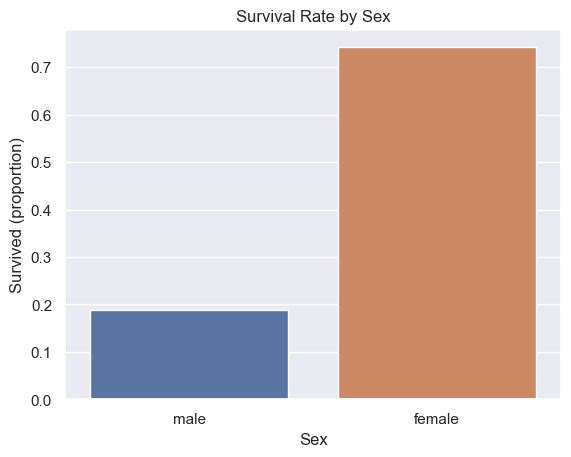

In [8]:
# plot a bar chart to visualize suvival rate vs sex
sns.set()
plt.figure(num= 2)

sns.barplot(data= titanic, x= 'sex', y= 'survived', hue= 'sex', errorbar= None)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survived (proportion)')

plt.show()

A larger proportion of females survived vs males. Therefore, more men died on the Titanic.

In [9]:
# to verify take a look at actual total counts
titanic.value_counts('sex')

sex
male      577
female    314
Name: count, dtype: int64

In [10]:
# then look at actual counts of survived vs didn't survive between sexes
titanic.value_counts(['sex', 'survived'])

sex     survived
male    0           468
female  1           233
male    1           109
female  0            81
Name: count, dtype: int64

Which passenger class was more likely to surive?

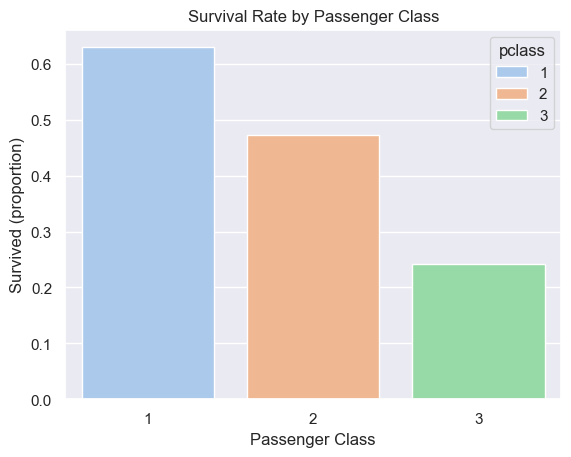

In [11]:
# plot a bar chart to visualize passenger class vs survived
sns.set()
plt.figure(num= 3)

sns.barplot(data= titanic, x= 'pclass', y= 'survived', hue= 'pclass', palette= 'pastel', errorbar= None)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survived (proportion)')

plt.show()

Passenger class 1 had the higher survival rate, and thus was the most likely to survive.

What does the distribution of fare look like?

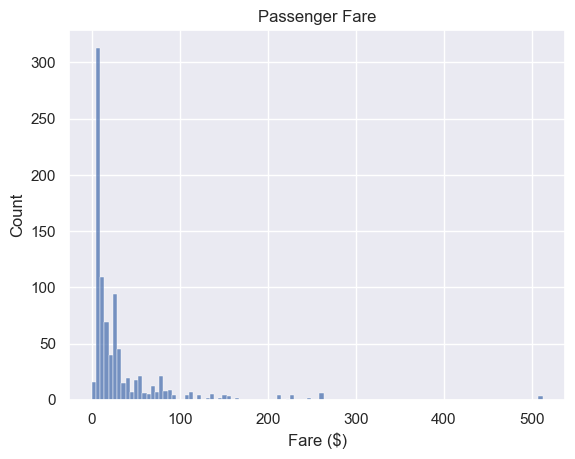

In [12]:
# plot the distribution of fare
plt.figure(num= 4)

sns.histplot(data= titanic, x= 'fare')
plt.title('Passenger Fare')
plt.xlabel('Fare ($)')
plt.ylabel('Count')

plt.show()

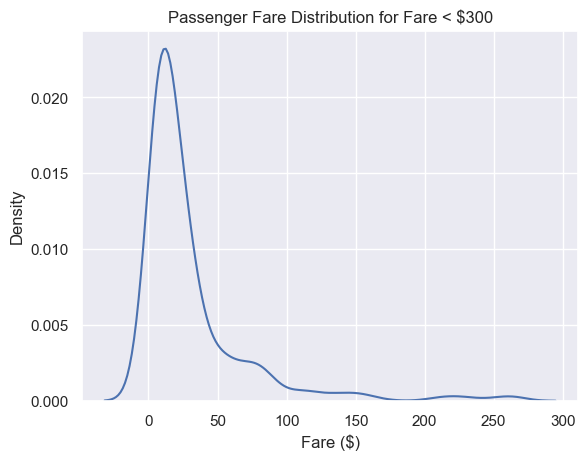

In [13]:
# look at data for fares under 300, to ignore the data point(s) above 500
plt.figure(num= 5)

fare= 'fare'
t_filt= titanic[titanic[fare] < 300]

sns.kdeplot(data= t_filt, x= 'fare')
plt.title('Passenger Fare Distribution for Fare < $300')
plt.xlabel('Fare ($)')

plt.show()

In [14]:
titanic['fare'].median(), titanic['fare'].mean()

(14.4542, 32.204207968574636)

The majority of fares fall into the range of about (0, 50). However, the data is skewed right, and this is confirmed by looking at the actual values of the median and mean of the fares.

What does the distribution of nun-null age values look like?

In [15]:
# create a df of non-null age values
ages= pd.DataFrame(titanic['age'].dropna(), columns=['age'])
ages

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
885,39.0
886,27.0
887,19.0
889,26.0


<Figure size 640x480 with 0 Axes>

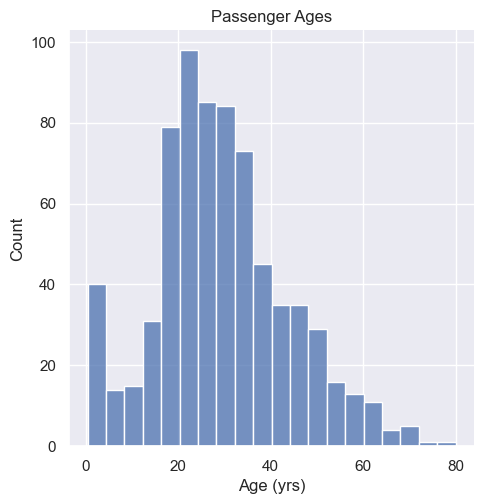

In [16]:
# plot non-null age distribution
plt.figure(num= 6)

sns.displot(data= ages, x= 'age')
plt.title('Passenger Ages')
plt.xlabel('Age (yrs)')

plt.show()

What is the median age of each passenger class(pclass)? Visualize this in a box plot.

In [17]:
# calculate median age of each passenger class
class_age= titanic.groupby(['pclass'])
class_age['age'].median()

pclass
1    37.0
2    29.0
3    24.0
Name: age, dtype: float64

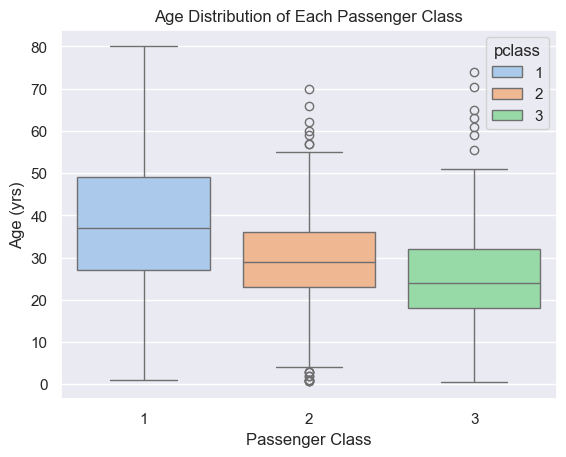

In [18]:
# plot median age per passenger class in a box plot
plt.figure(num= 7)

sns.boxplot(data= titanic, x= 'pclass', y= 'age', hue= 'pclass', palette= 'pastel')
plt.title('Age Distribution of Each Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age (yrs)')

plt.show()

## Part 2: Data Cleansing

In [19]:
# revist our dataset
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [20]:
# remove the deck feature (since it had so many missing values)
titanic.drop('deck', axis= 1, inplace= True)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [ ]:
# define a lambda function to impute age using the median of the passenger class computed earlier

# This was what was messing my code up to begin with:

#titanic.age.fillna(lambda x: x.groupby('pclass').age.median(), inplace= True)    # This was causing the fill in
# value to be the lambda object, which was then messing up everything that follows, syntax is missing something or
# messed up somewhere, had to do it the way below without the labmda function to at least get everything else working

In [21]:
# impute age using the median of the passenger class
titanic.age.fillna(titanic.groupby('pclass').age.transform(np.mean), inplace= True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


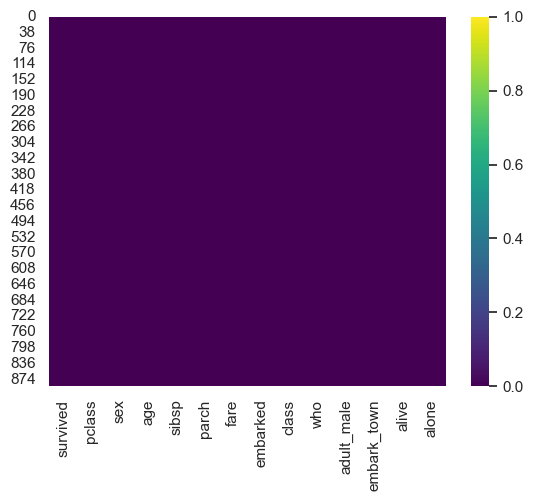

In [22]:
# create heatmap to re-look at missing values
sns.heatmap(titanic.isnull(), cmap= 'viridis')
plt.show()

There are no longer any null values in the age feature.

In [23]:
# drop remaining records with null values
titanic.dropna(axis= 0, inplace= True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
 13  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 86.1+ KB


Our data set now only contains 12 feature categories and no longer has any null values.

There are several other features in this dataset that are duplicates of another feature or engineered from other features. After identifying those features and relationships, those features will also be removed.

- pclass is identical to class; pclass is an int datatype of the string representation of class.

- survived is identical to alive; survived is an int datatype of the object representation of alive (i.e., survived is a numerical boolean representation of alive status)

- embarked is identical to embark_town; embark is only the first char representation of the string of embark_town

- adult_male is engineered from sex and age, such that if sex == male and age > 15 , then adult_male is True, else adult_male is False. (Visual investigation below.)

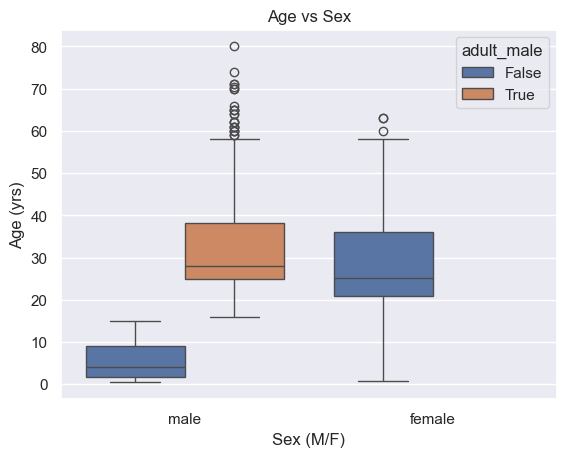

In [24]:
# visualize spread of age data for each sex and whether they were marked as an adult_male with a boxplot
plt.figure(num= 8)

sns.boxplot(data=titanic, x= 'sex', y= 'age', hue= 'adult_male')
plt.title('Age vs Sex')
plt.xlabel('Sex (M/F)')
plt.ylabel('Age (yrs)')

plt.show()

- who is engineered from sex and age, such that if age > 15 and sex == male, then who is man; elif age > 15 and sex == female, then who is woman; else who is child (i.e., all ages 15 and under, regardless of sex). (Visusal investigation below.) 

In [25]:
# check options for 'who' feature
titanic.value_counts(['who'])

who  
man      537
woman    269
child     83
Name: count, dtype: int64

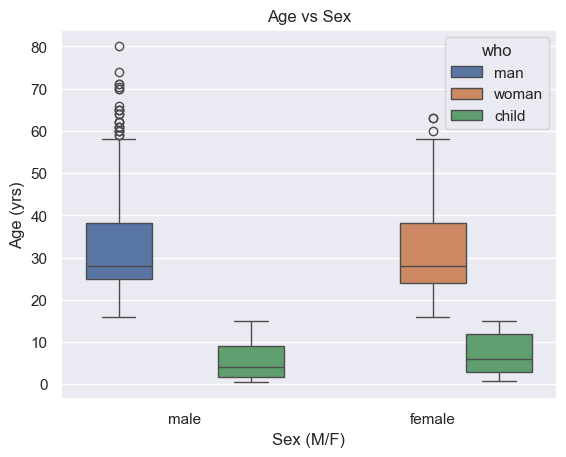

In [26]:
# visualize spread of age data for each sex and what value for 'who' they were given
plt.figure(num= 9)

sns.boxplot(data=titanic, x= 'sex', y= 'age', hue= 'who')
plt.title('Age vs Sex')
plt.xlabel('Sex (M/F)')
plt.ylabel('Age (yrs)')

plt.show()

Due to their redundant nature, the following classes will be removed:
- class
- who
- adult_male
- alive
- embarked

In [27]:
# remove the above classes
removed_classes= ['class', 'who', 'adult_male', 'alive', 'embarked']
titanic.drop(removed_classes, axis= 1, inplace= True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          889 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   embark_town  889 non-null    object 
 8   alone        889 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 63.4+ KB


In [28]:
# convert categorical variables (that aren't already numerically coded) to numeric dummies
dummy= pd.get_dummies(titanic, columns=['sex', 'alone', 'embark_town'], drop_first= True, dtype= float)
dummy.head()

,survived,pclass,age,sibsp,parch,fare,sex_male,alone_True,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.2500,1.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,0.0,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,1.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,1.0,1.0,0.0,1.0


In [29]:
# create feature set by dropping survived
X = pd.DataFrame(dummy.drop(labels= ['survived'], axis= 1))

In [30]:
# resulting dataframe should include pclass, age, sibsp, parch, fare, and the categorical dummy columns
X.head()

,pclass,age,sibsp,parch,fare,sex_male,alone_True,embark_town_Queenstown,embark_town_Southampton
0,3,22.0,1,0,7.2500,1.0,0.0,0.0,1.0
1,1,38.0,1,0,71.2833,0.0,0.0,0.0,0.0
2,3,26.0,0,0,7.9250,0.0,1.0,0.0,1.0
3,1,35.0,1,0,53.1000,0.0,0.0,0.0,1.0
4,3,35.0,0,0,8.0500,1.0,1.0,0.0,1.0


In [31]:
# create target dataframe from the survived column of the dataset
y = pd.DataFrame(data= dummy, columns= ['survived'])
y.head()

,survived
0,0
1,1
2,1
3,1
4,0


In [32]:
# split clean data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 42, stratify= y.survived)

In [33]:
X_train

,pclass,age,sibsp,parch,fare,sex_male,alone_True,embark_town_Queenstown,embark_town_Southampton
621,1,42.000000,1,0,52.5542,1.0,0.0,0.0,1.0
481,2,29.877630,0,0,0.0000,1.0,1.0,0.0,1.0
527,1,38.233441,0,0,221.7792,1.0,1.0,0.0,1.0
435,1,14.000000,1,2,120.0000,0.0,0.0,0.0,1.0
797,3,31.000000,0,0,8.6833,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
359,3,25.140620,0,0,7.8792,0.0,1.0,1.0,0.0
643,3,25.140620,0,0,56.4958,1.0,1.0,0.0,1.0
736,3,48.000000,1,3,34.3750,0.0,0.0,0.0,1.0
462,1,47.000000,0,0,38.5000,1.0,1.0,0.0,1.0


## Part 3: Model Training

Implement a logistic regression, support vector classifier, and an sgd classifier.

In [34]:
# implement a logistic regression model
logreg_model = LogisticRegression(max_iter= 1000)
logreg_model_preds = cross_val_predict(estimator= logreg_model, X= X_train, y= y_train.survived, cv= 5, method= 'predict_proba')

In [35]:
# implement a suport vector classifier
svm_clf = svm.SVC(probability= True)
svm_clf_preds= cross_val_predict(estimator= svm_clf, X= X_train, y= y_train.survived, cv= 5, method= 'predict_proba')

In [36]:
# implement an sgd classifier
sgd_clf = SGDClassifier()
sgd_clf_preds = cross_val_predict(estimator= sgd_clf, X= X_train, y= y_train.survived, cv= 5, method= 'decision_function')

Print out classification reports, confustion matrices, and roc scores/charts for each model.

*** Logistic Regression ***

Confusion Matrix:
[[377  62]
 [ 80 192]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       439
           1       0.76      0.71      0.73       272

    accuracy                           0.80       711
   macro avg       0.79      0.78      0.79       711
weighted avg       0.80      0.80      0.80       711


ROC-AUC Score:
0.8472254790298808




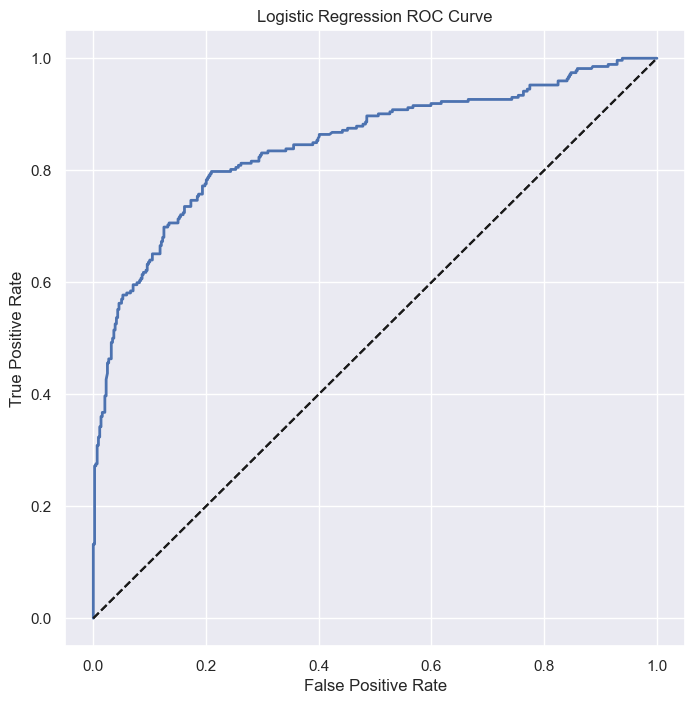



*** Support Vector Classifier ***

Confusion Matrix:
[[399  40]
 [184  88]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.91      0.78       439
           1       0.69      0.32      0.44       272

    accuracy                           0.68       711
   macro avg       0.69      0.62      0.61       711
weighted avg       0.69      0.68      0.65       711


ROC-AUC Score:
0.7196795859573897




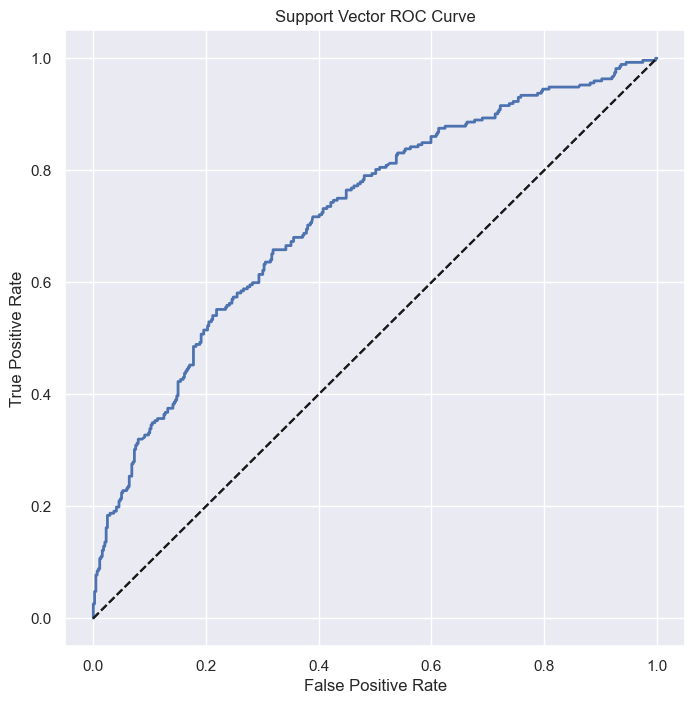



*** SGD Classifier ***

Confusion Matrix:
[[355  84]
 [124 148]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.81      0.77       439
           1       0.64      0.54      0.59       272

    accuracy                           0.71       711
   macro avg       0.69      0.68      0.68       711
weighted avg       0.70      0.71      0.70       711


ROC-AUC Score:
0.7382713051051855




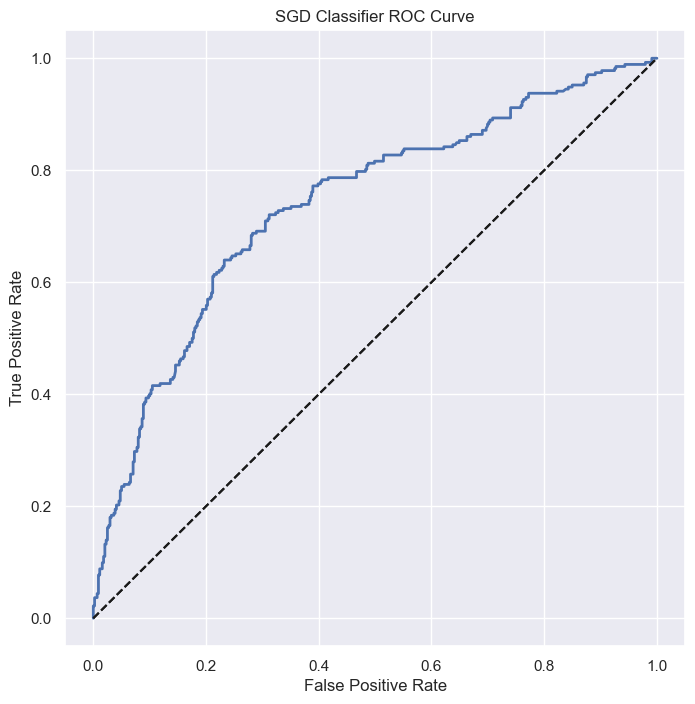

In [37]:
print('*** Logistic Regression ***')
print('\nConfusion Matrix:')
print(confusion_matrix(y_true= y_train, y_pred= logreg_model_preds[:, 1] >= 0.5))
print('\nClassification Report:')
print(classification_report(y_true= y_train, y_pred= logreg_model_preds[:, 1] >= 0.5))
print('\nROC-AUC Score:')
print(roc_auc_score(y_true= y_train, y_score= logreg_model_preds[:, 1]))
print('\n')
fpr, tpr, thresh = roc_curve(y_true= y_train, y_score= logreg_model_preds[:, 1])
plt.figure(figsize= (8, 8), num= 1)
plt.plot(fpr, tpr, linewidth= 2)
plt.plot([(0, 0), (1, 1)], 'k--')
plt.title('Logistic Regression ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('\n')

print('*** Support Vector Classifier ***')
print('\nConfusion Matrix:')
print(confusion_matrix(y_true= y_train, y_pred= svm_clf_preds[:, 1] >= 0.5))
print('\nClassification Report:')
print(classification_report(y_true= y_train, y_pred= svm_clf_preds[:, 1] >= 0.5))
print('\nROC-AUC Score:')
print(roc_auc_score(y_true= y_train, y_score= svm_clf_preds[:, 1]))
print('\n')
fpr, tpr, thresh = roc_curve(y_true= y_train, y_score= svm_clf_preds[:, 1])
plt.figure(figsize= (8, 8), num= 2)
plt.plot(fpr, tpr, linewidth= 2)
plt.plot([(0, 0), (1, 1)], 'k--')
plt.title('Support Vector ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('\n')

print('*** SGD Classifier ***')
print('\nConfusion Matrix:')
print(confusion_matrix(y_true= y_train, y_pred= sgd_clf_preds > 0))
print('\nClassification Report:')
print(classification_report(y_true= y_train, y_pred= sgd_clf_preds > 0))
print('\nROC-AUC Score:')
print(roc_auc_score(y_true= y_train, y_score= sgd_clf_preds))
fpr, tpr, thresh = roc_curve(y_true= y_train, y_score= sgd_clf_preds)
print('\n')
plt.figure(figsize= (8, 8), num= 3)
plt.plot(fpr, tpr, linewidth= 2)
plt.plot([(0, 0), (1, 1)], 'k--')
plt.title('SGD Classifier ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('\n')

In [38]:
plt.close('all')

## Part 4: Model Tuning

See if scaling the input data affects the Support Vector Classifier model. Implement a sklearn pipeline to combine scaling and instanstiation of the model.

In [39]:
# implement a sklearn pipeline to combine scaling and instantiation of model
svm_clf_scaled = \
Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', svm.SVC(probability= True))
])

svm_clf_scaled_preds = cross_val_predict(estimator= svm_clf_scaled, X= X_train, y= y_train.survived, cv= 5,
                                         method= 'predict_proba')

Print out classification reports, confustion matrices, and roc scores/charts for this model

*** Support Vector Classifier w/Scaled Data ***

Confusion Matrix:
[[395  44]
 [ 84 188]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       439
           1       0.81      0.69      0.75       272

    accuracy                           0.82       711
   macro avg       0.82      0.80      0.80       711
weighted avg       0.82      0.82      0.82       711


ROC-AUC Score:
0.8378961208629239




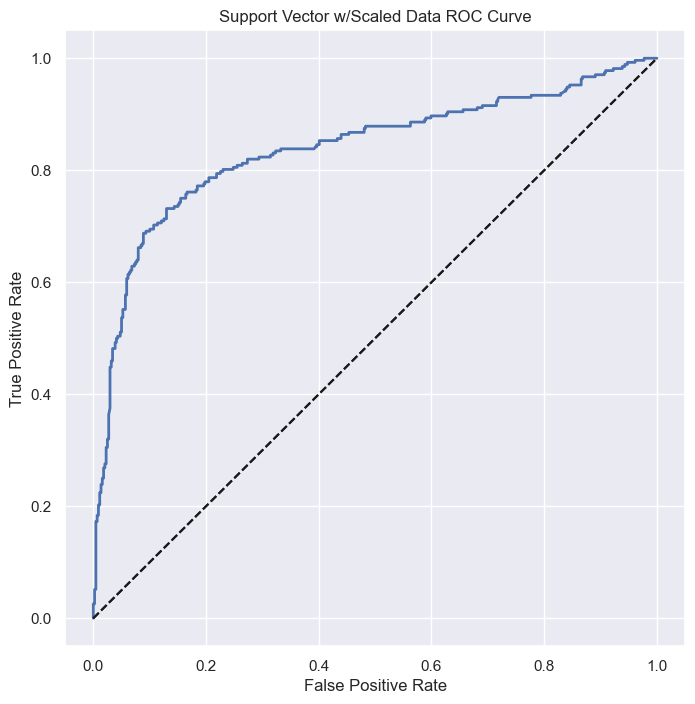

In [40]:
print('*** Support Vector Classifier w/Scaled Data ***')
print('\nConfusion Matrix:')
print(confusion_matrix(y_true= y_train, y_pred= svm_clf_scaled_preds[:, 1] >= 0.5))
print('\nClassification Report:')
print(classification_report(y_true= y_train, y_pred= svm_clf_scaled_preds[:, 1] >= 0.5))
print('\nROC-AUC Score:')
print(roc_auc_score(y_true= y_train, y_score= svm_clf_scaled_preds[:, 1]))
print('\n')
fpr, tpr, thresh = roc_curve(y_true= y_train, y_score= svm_clf_scaled_preds[:, 1])
plt.figure(figsize= (8, 8), num= 4)
plt.plot(fpr, tpr, linewidth= 2)
plt.plot([(0, 0), (1, 1)], 'k--')
plt.title('Support Vector w/Scaled Data ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('\n')

In [41]:
plt.close(fig= 4)

The Support Vector Classifier performs better when the data is scaled beforehand.

Perform a grid search of the pipeline classifier using the following parameter grid:
- {'kernel': ['rbf'], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1], {'C': [1, 10, 50, 100, 200, 300]}

In [42]:
# implement a sklearn pipeline to combine scaling and instantiation of model
svm_clf_scaled = \
Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', svm.SVC(probability= True))
])

# set up the grid
# {'kernel': ['rbf'], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1], {'C': [1, 10, 50, 100, 200, 300]}'
grid = {'svm_clf__kernel': ['rbf'],
        'svm_clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1],
        'svm_clf__C': [1, 10, 50, 100, 200, 300]
       }

# set up the grid search
grid_search = \
GridSearchCV(estimator= svm_clf_scaled,
             param_grid= grid,
             cv= 5,
             verbose= 5,
             scoring= 'roc_auc')

# perform the grid search
grid_search.fit(X_train, y_train.survived)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END svm_clf__C=1, svm_clf__gamma=0.0001, svm_clf__kernel=rbf;, score=0.837 total time=   0.0s
[CV 2/5] END svm_clf__C=1, svm_clf__gamma=0.0001, svm_clf__kernel=rbf;, score=0.829 total time=   0.0s
[CV 3/5] END svm_clf__C=1, svm_clf__gamma=0.0001, svm_clf__kernel=rbf;, score=0.839 total time=   0.0s
[CV 4/5] END svm_clf__C=1, svm_clf__gamma=0.0001, svm_clf__kernel=rbf;, score=0.860 total time=   0.0s
[CV 5/5] END svm_clf__C=1, svm_clf__gamma=0.0001, svm_clf__kernel=rbf;, score=0.858 total time=   0.0s
[CV 1/5] END svm_clf__C=1, svm_clf__gamma=0.001, svm_clf__kernel=rbf;, score=0.844 total time=   0.0s
[CV 2/5] END svm_clf__C=1, svm_clf__gamma=0.001, svm_clf__kernel=rbf;, score=0.832 total time=   0.0s
[CV 3/5] END svm_clf__C=1, svm_clf__gamma=0.001, svm_clf__kernel=rbf;, score=0.839 total time=   0.0s
[CV 4/5] END svm_clf__C=1, svm_clf__gamma=0.001, svm_clf__kernel=rbf;, score=0.862 total time=   0.0s
[CV 5/5] END sv

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm_clf', SVC(probability=True))]),
             param_grid={'svm_clf__C': [1, 10, 50, 100, 200, 300],
                         'svm_clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                         'svm_clf__kernel': ['rbf']},
             scoring='roc_auc', verbose=5)

In [43]:
# print the best estimator, its parameters and the resulting score
print(f'Best estimator: {grid_search.best_estimator_}')
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best ROC-AUC score: {grid_search.best_score_}')

Best estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=1, gamma=0.1, probability=True))])
Best parameters: {'svm_clf__C': 1, 'svm_clf__gamma': 0.1, 'svm_clf__kernel': 'rbf'}
Best ROC-AUC score: 0.8495547428306048


In [44]:
# apply this estimator to your test set
best_svm_clf_scaled_preds = grid_search.predict_proba(X_test)[:, 1]

In [45]:
best_svm_clf_scaled_preds

array([0.09426942, 0.15883187, 0.15883187, 0.15458786, 0.0640032 ,
       0.91631714, 0.15384346, 0.82213671, 0.89367971, 0.15582652,
       0.15883187, 0.87794173, 0.87955915, 0.88885332, 0.9421298 ,
       0.78770192, 0.84882718, 0.85567493, 0.15752344, 0.15565425,
       0.15879309, 0.15713022, 0.16019867, 0.15732215, 0.20814688,
       0.81213942, 0.65326199, 0.84312771, 0.15389411, 0.89612824,
       0.94627605, 0.14812303, 0.15399716, 0.1540085 , 0.29157009,
       0.15890482, 0.15663755, 0.15459881, 0.13901213, 0.16229521,
       0.90265513, 0.20356503, 0.84773987, 0.89884808, 0.09553319,
       0.06397672, 0.8514545 , 0.15899862, 0.15514818, 0.16597561,
       0.10390126, 0.16079972, 0.15388574, 0.83347087, 0.66990722,
       0.15170931, 0.23146046, 0.5       , 0.15964085, 0.15879776,
       0.15439792, 0.17293874, 0.1572907 , 0.15686486, 0.89878948,
       0.15840695, 0.15194188, 0.42315022, 0.15314222, 0.53404793,
       0.76438089, 0.15280922, 0.63179096, 0.15399716, 0.31053

*** Best Support Vector Classifier w/Test Data ***

Confusion Matrix:
[[101   9]
 [ 22  46]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       110
           1       0.84      0.68      0.75        68

    accuracy                           0.83       178
   macro avg       0.83      0.80      0.81       178
weighted avg       0.83      0.83      0.82       178


ROC-AUC Score:
0.843716577540107




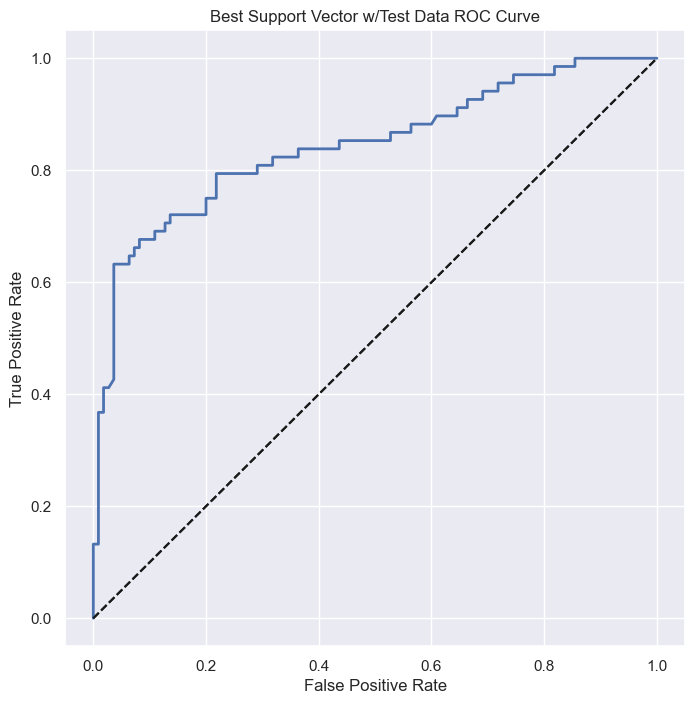

In [46]:
print('*** Best Support Vector Classifier w/Test Data ***')
print('\nConfusion Matrix:')
print(confusion_matrix(y_true= y_test, y_pred= best_svm_clf_scaled_preds >= 0.5))
print('\nClassification Report:')
print(classification_report(y_true= y_test, y_pred= best_svm_clf_scaled_preds >= 0.5))
print('\nROC-AUC Score:')
print(roc_auc_score(y_true= y_test, y_score= best_svm_clf_scaled_preds))
print('\n')
fpr, tpr, thresh = roc_curve(y_true= y_test, y_score= best_svm_clf_scaled_preds)
plt.figure(figsize= (8, 8), num= 5)
plt.plot(fpr, tpr, linewidth= 2)
plt.plot([(0, 0), (1, 1)], 'k--')
plt.title('Best Support Vector w/Test Data ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('\n')

In [47]:
plt.close(fig= 5)